<a href="https://colab.research.google.com/github/alexmrin/Math-for-ML/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
!mkdir -p ~/.kaggle

n


In [351]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

n


In [352]:
!chmod 600 ~/.kaggle/kaggle.json


n


In [353]:
! kaggle competitions download -c titanic

n
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [354]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [355]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [356]:
training_data = pd.read_csv("/content/train.csv")
training_data.set_index("PassengerId", inplace=True)
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [357]:
y_train = training_data.loc[:, 'Survived']
X_train = training_data.drop(columns = ['Survived'])
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Text(0.5, 1.0, 'Sex vs. Surival')

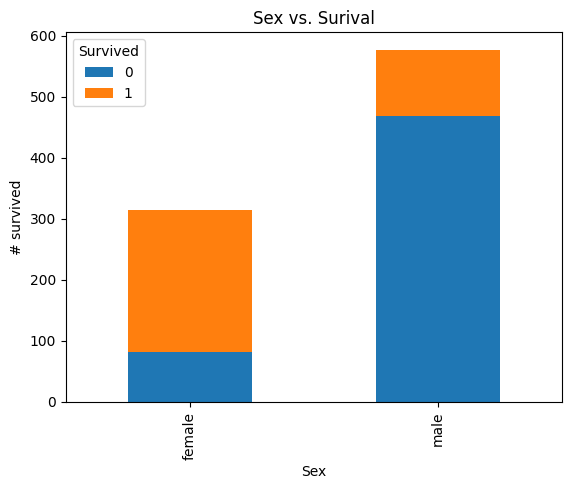

In [358]:
ct = pd.crosstab(X_train['Sex'], y_train)
ct.plot(kind='bar', stacked=True)
plt.ylabel('# survived')
plt.title('Sex vs. Surival')

In [359]:
null_values = X_train.isnull().sum()
null_values

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Number of samples: 714


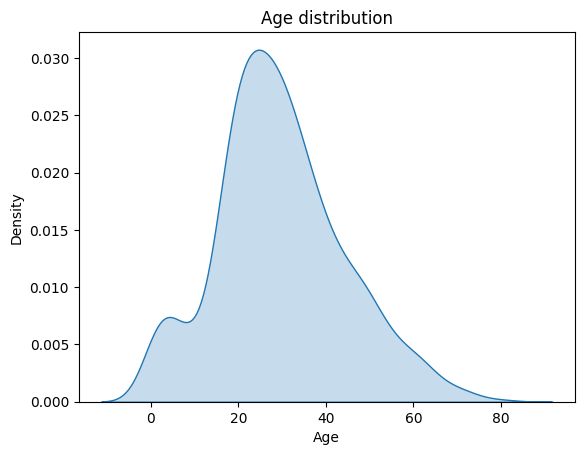

In [360]:
plt.title("Age distribution")
sns.kdeplot(data=X_train['Age'], fill=True)
print(f"Number of samples: {X_train['Age'].size - X_train['Age'].isnull().sum()}")

In [361]:
# Since such a large portion of the ages are missing I will sample with replacement to preserve the underlying distribution
null_samples = X_train['Age'].dropna().sample(n=null_values.loc['Age'], replace=True, random_state=0)

null_samples.index = X_train.loc[X_train['Age'].isnull()].index
X_train.loc[X_train['Age'].isnull(), 'Age'] = null_samples
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S


Number of samples: 891


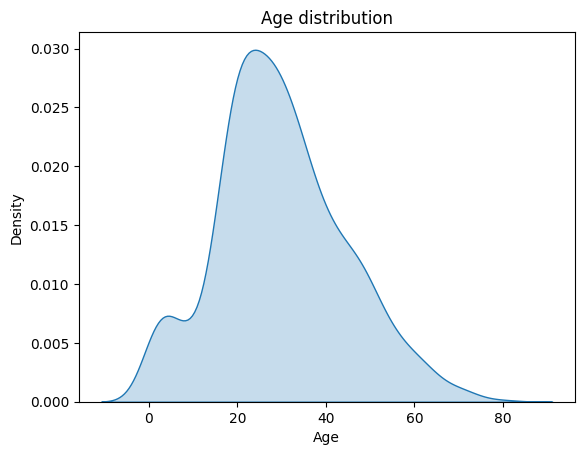

In [362]:
plt.title("Age distribution")
sns.kdeplot(data=X_train['Age'], fill=True)
print(f"Number of samples: {X_train['Age'].size - X_train['Age'].isnull().sum()}")

In [363]:
X_train.drop(columns='Cabin', inplace=True)

In [364]:
X_train.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [365]:
drop_indices = X_train[X_train['Embarked'].isnull()].index

X_train.drop(drop_indices, inplace=True)
y_train.drop(drop_indices, inplace=True)

Text(0.5, 1.0, 'Ticket class vs people survived')

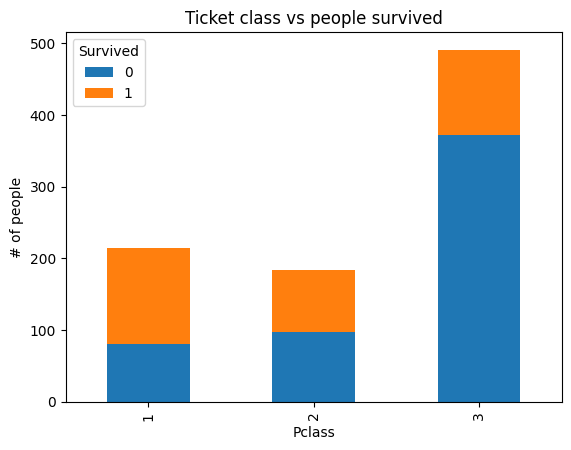

In [366]:
ct2 = pd.crosstab(X_train['Pclass'], y_train)
ct2.plot(kind='bar', stacked=True)
plt.ylabel('# of people')
plt.title('Ticket class vs people survived')

In [367]:
# one hot encoding with pclass
X_train = pd.get_dummies(X_train, columns=['Pclass'])
# dropping names
X_train.drop(columns = 'Name', inplace=True)
# turning sex numerical
X_train['Sex'] = X_train['Sex'].map(lambda x: 1 if x == "male" else 0)
# drop ticket name
X_train.drop(columns= 'Ticket', inplace=True)

In [368]:
X_train

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
1,1,22.0,1,0,7.2500,S,0,0,1
2,0,38.0,1,0,71.2833,C,1,0,0
3,0,26.0,0,0,7.9250,S,0,0,1
4,0,35.0,1,0,53.1000,S,1,0,0
5,1,35.0,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...
887,1,27.0,0,0,13.0000,S,0,1,0
888,0,19.0,0,0,30.0000,S,1,0,0
889,0,21.0,1,2,23.4500,S,0,0,1


Text(0.5, 1.0, 'Embarked location vs people survived')

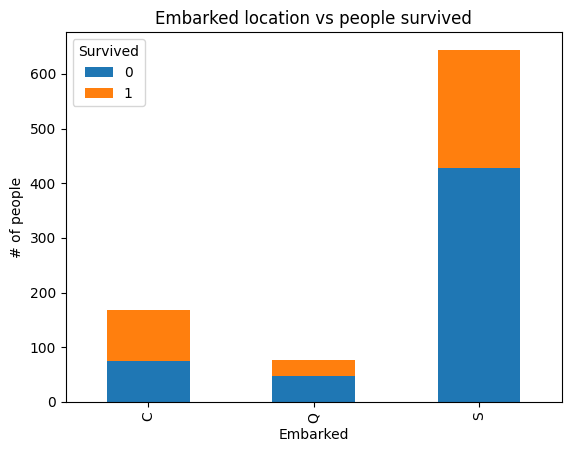

In [369]:
ct3 = pd.crosstab(X_train['Embarked'], y_train)
ct3.plot(kind='bar', stacked=True)
plt.ylabel("# of people")
plt.title("Embarked location vs people survived")

In [370]:
X_train = pd.get_dummies(X_train, columns=['Embarked'])
X_train

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,22.0,1,0,7.2500,0,0,1,0,0,1
2,0,38.0,1,0,71.2833,1,0,0,1,0,0
3,0,26.0,0,0,7.9250,0,0,1,0,0,1
4,0,35.0,1,0,53.1000,1,0,0,0,0,1
5,1,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,1,27.0,0,0,13.0000,0,1,0,0,0,1
888,0,19.0,0,0,30.0000,1,0,0,0,0,1
889,0,21.0,1,2,23.4500,0,0,1,0,0,1


In [371]:
model = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             random_state=0)
model.fit(X_train, y_train)

# load and preprocess the test set
test_data = pd.read_csv('/content/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [372]:
test_data.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)
test_data.set_index('PassengerId', inplace=True)

In [373]:
test_data['Sex'] = test_data['Sex'].map(lambda x: 1 if x == "male" else 0)
imputer = SimpleImputer(strategy='mean')
test_data['Fare'] = imputer.fit_transform(test_data[['Fare']])
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [374]:
test_data = pd.get_dummies(test_data, columns=['Pclass', 'Embarked'])

Text(0.5, 1.0, 'Age distribution of test set')

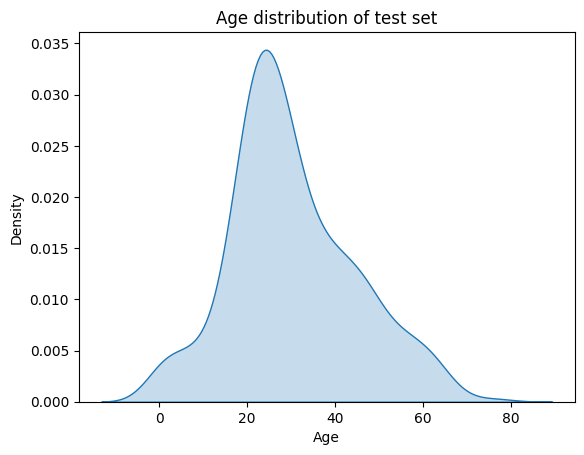

In [375]:
sns.kdeplot(test_data['Age'], fill=True)
plt.title('Age distribution of test set')

In [376]:
num_null = test_data.isnull().sum().loc['Age']
null_samples = test_data['Age'].dropna().sample(n=num_null, replace=True, random_state=0)
null_samples.index = test_data.loc[test_data['Age'].isnull()].index
test_data.loc[test_data['Age'].isnull(), 'Age'] = null_samples
test_data.loc[:, 'Age']

PassengerId
892     34.5
893     47.0
894     62.0
895     27.0
896     22.0
        ... 
1305    17.0
1306    39.0
1307    38.5
1308    25.0
1309    36.0
Name: Age, Length: 418, dtype: float64

In [379]:
predictions = model.predict(test_data)
predictions = pd.DataFrame(predictions, columns=['Survived'], index=test_data.index)
predictions.to_csv('/content/gender_submission.csv')

In [380]:
!kaggle competitions submit -c 'titanic' -f '/content/gender_submission.csv' -m 'First submit'

100% 2.77k/2.77k [00:00<00:00, 5.94kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster